## ML Project on House price Predictions by Team_5
### n01650605 - Sasidhar Rama Reddy
### n01654036 -Srilatha Nallamothu
### n01656804 -Jyothi swaroop Muralasetti
### n01653776 - Garima Rathee
### n01652820 - Sumeet Yadav

## Importing necessary Libraries

In [135]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso
import seaborn as sns
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_squared_error, accuracy_score


## Loading and observation of Data

In [141]:
df = pd.read_csv(r"C:\Users\User\Desktop\ML\HousingDataSet.csv")
print(df.head())


           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7      1180.0              0   
1      7242     2.0           0     0  ...      7      2170.0            400   
2     10000     1.0           0     0  ...      6       770.0              0   
3      5000     1.0           0     0  ...      7      1050.0            910   
4      8080     1.0           0     0  ...      8      1680.0              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [143]:
df.shape

(21613, 21)

In [145]:
print('This dataset includes', df.shape[0], 'rows and', df.shape[1], 'columns.')

This dataset includes 21613 rows and 21 columns.


In [147]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above       float64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## Data Cleaning

 
### Converted the `date` column to datetime format, `zipcode` to string, and `lat` & `long` to float for accurate data handling and analysis.  


In [11]:

df['date'] = pd.to_datetime(df['date'])
df['zipcode'] = df['zipcode'].astype(str)
df['lat'] = df['lat'].astype(float)
df['long'] = df['long'].astype(float)

In [13]:
df.dtypes.value_counts()

int64             13
float64            6
datetime64[ns]     1
object             1
Name: count, dtype: int64

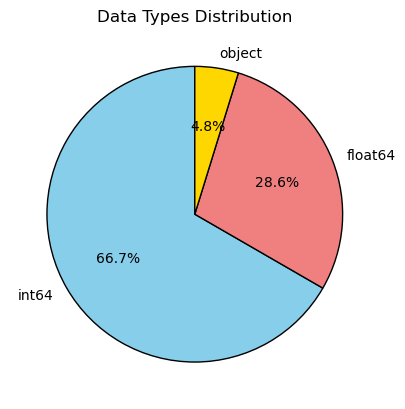

In [392]:
import matplotlib.pyplot as plt

df.dtypes.value_counts().plot.pie(
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['skyblue', 'lightcoral', 'gold', 'lightgreen'],  # Custom colors
    wedgeprops={'edgecolor': 'black'}  # Black edges for better contrast
)

plt.ylabel('')  # Remove the default label
plt.title('Data Types Distribution')
plt.show()


### Finding Null values

In [17]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Dealing with Null Values

#### Impute missing values in 'sqft_above' with the median value of the column

In [19]:

df['sqft_above'] = df['sqft_above'].fillna(df['sqft_above'].median())


### Verifying that all the null values are eliminated

In [21]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [23]:
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
id,21613.0,4580301520.864988,1000102.0,2123049194.0,3904930410.0,7308900445.0,9900000190.0,2876565571.312049
date,21613,2014-10-29 04:38:01.959931648,2014-05-02 00:00:00,2014-07-22 00:00:00,2014-10-16 00:00:00,2015-02-17 00:00:00,2015-05-27 00:00:00,NaN
price,21613.0,540088.141767,75000.0,321950.0,450000.0,645000.0,7700000.0,367127.196483
bedrooms,21613.0,3.370842,0.0,3.0,3.0,4.0,33.0,0.930062
bathrooms,21613.0,2.114757,0.0,1.75,2.25,2.5,8.0,0.770163
sqft_living,21613.0,2079.899736,290.0,1427.0,1910.0,2550.0,13540.0,918.440897
sqft_lot,21613.0,15106.967566,520.0,5040.0,7618.0,10688.0,1651359.0,41420.511515
floors,21613.0,1.494309,1.0,1.0,1.5,2.0,3.5,0.539989
waterfront,21613.0,0.007542,0.0,0.0,0.0,0.0,1.0,0.086517
view,21613.0,0.234303,0.0,0.0,0.0,0.0,4.0,0.766318


## Finding the Price Distribution Using Histogram

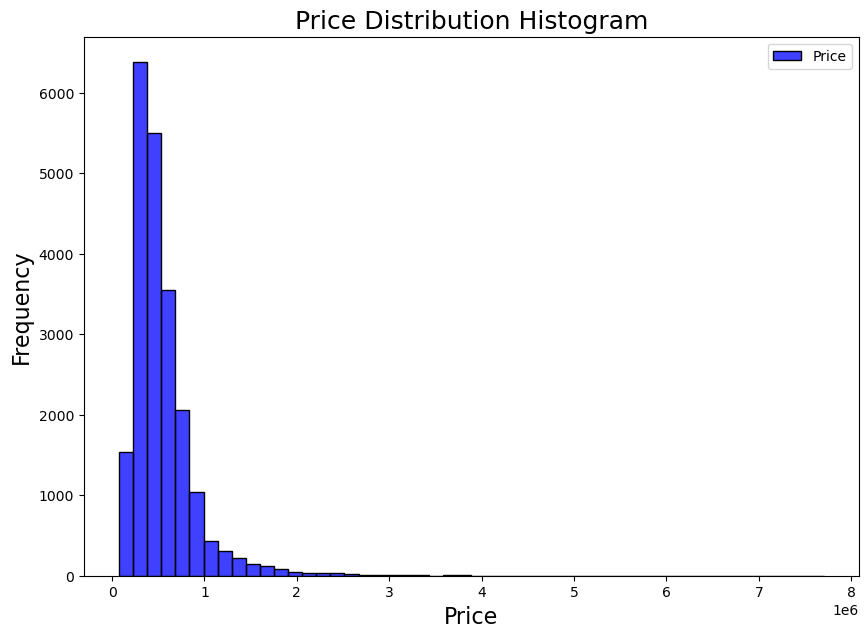

In [25]:

plt.figure(figsize=(10, 7))  
sns.histplot(df['price'], bins=50, label='Price', stat='count', color='blue')  # Removed kde=True

plt.xlabel('Price', fontsize=16)
plt.ylabel('Frequency', fontsize=16) 
plt.title('Price Distribution Histogram', fontsize=18)
plt.legend()

plt.show()


Almost house prices are distributed from 0 to 1 million dollars.

Prices around 0.5 millions dollars appear most frequently.

There exist some outliers values that we can skip in order to present their influence to our ML mode



### Dealing with Outliers in the Data

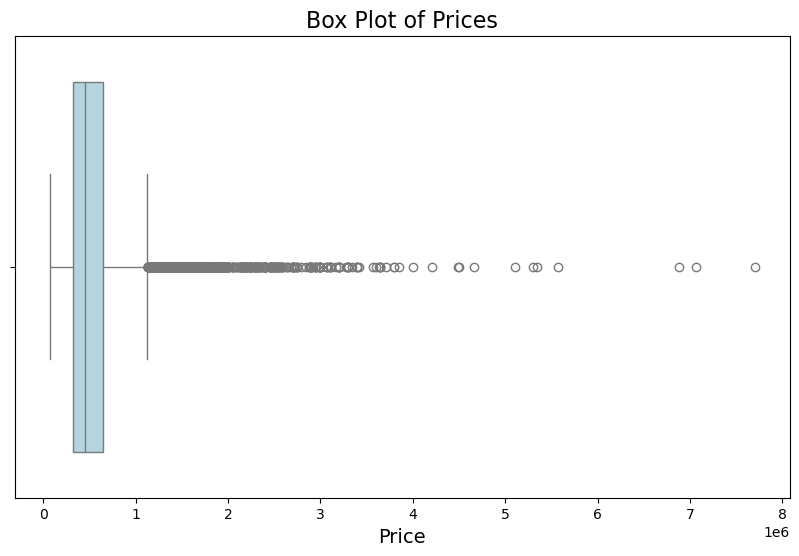

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'], color='lightblue')

plt.xlabel("Price", fontsize=14)
plt.title("Box Plot of Prices", fontsize=16)

plt.show()

## correlation matrix to see the most varicance contirbuting variables

<Axes: >

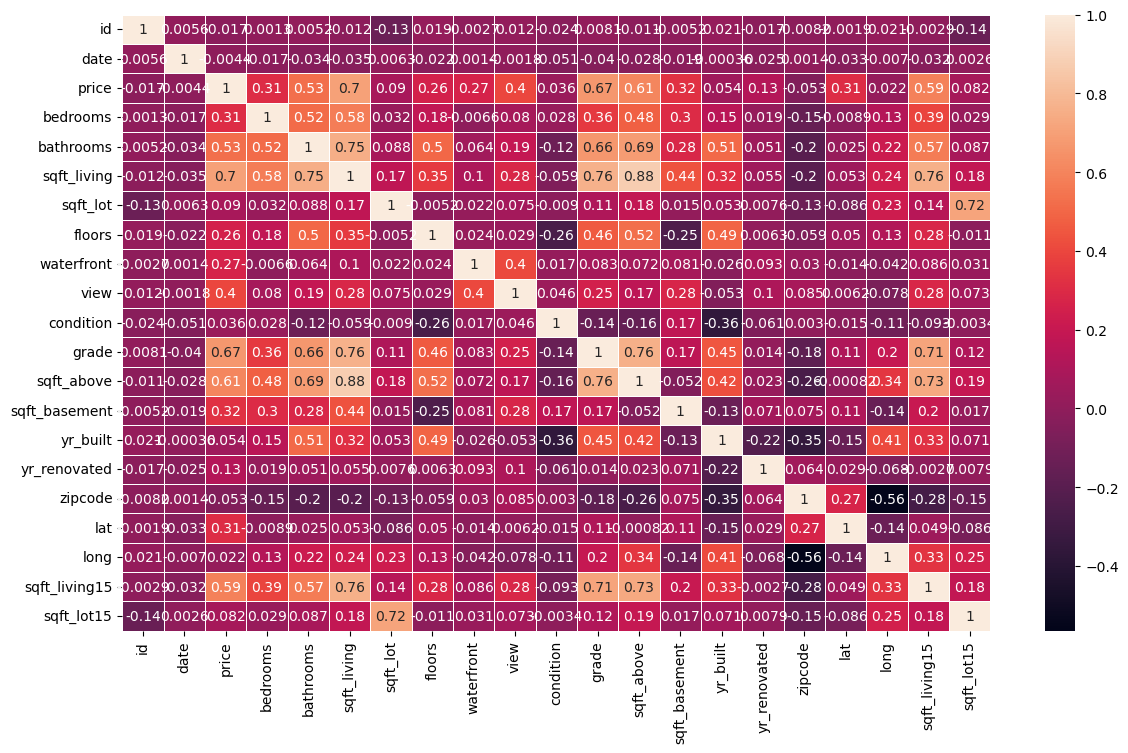

In [30]:
plt.figure(figsize = (14,8))
sns.heatmap(df.corr(), linewidths = 0.5, annot = True)

## Predictor variables that are highly related to Target variable Price 

In [31]:
df.corr()["price"].sort_values(ascending = False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605561
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
date            -0.004357
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

The above result shows that the price is highly correlated with some variables as sqft_living, grade, sqft_above, sqft_living15 and bathrooms. Id and zipcode have very weak correlations with the price.

Reject outliers Based on the distribution of price, there is only some values which are larger than 2.5 million. Therefore we can consider t = 2500000 as a threshold for filtering the outliers. All the house whose prices larger than will be dropped from the dataset

## Setting the Threshold to eliminate the Outliers

In [166]:

t = 2.5*10**6
df_new = df[df['price']<= t]


## Changes in the DataFrame after removing the Outliers

In [38]:
df_new.shape

(21516, 21)

In [40]:

df.shape[0] - df_new.shape[0]

97

## Updated Histogram

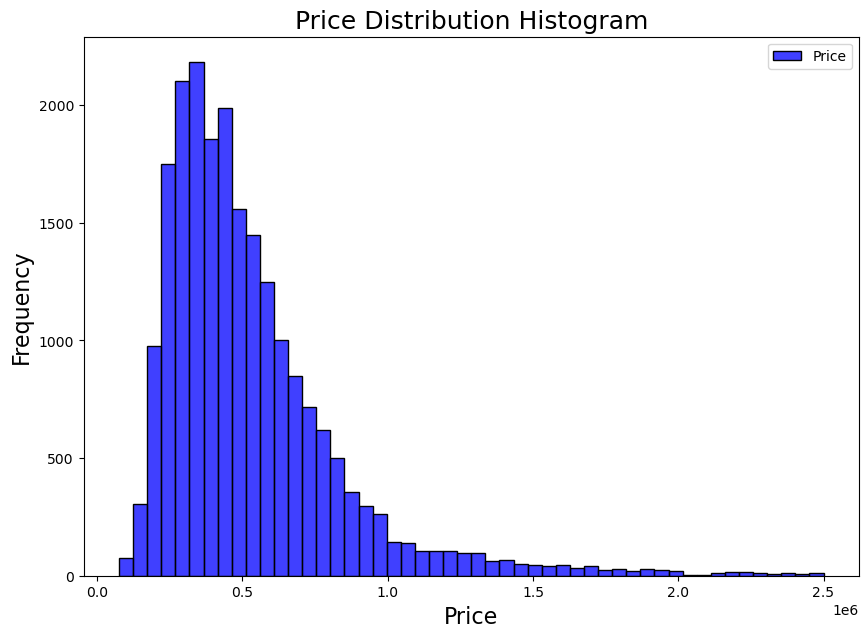

In [42]:
plt.figure(figsize=(10, 7))  
sns.histplot(df_new['price'], bins=50, label='Price', stat='count', color='blue')  # Removed kde=True

plt.xlabel('Price', fontsize=16)
plt.ylabel('Frequency', fontsize=16) 
plt.title('Price Distribution Histogram', fontsize=18)
plt.legend()

plt.show()

## Dropping the unnecessary columns for the analysis

In [172]:

df_new = df_new.drop(['id','date', 'zipcode'], axis = 1)

In [174]:
df_new

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530.0,0,2009,0,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310.0,0,2014,0,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020.0,0,2009,0,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600.0,0,2004,0,47.5345,-122.069,1410,1287


## Assigning the Features and Target Variables

In [177]:
X = df_new.drop(columns=['price'])  # Features
y = df_new['price']  # Target variable

## Splitting the Data into Training and Testing

In [50]:

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Standardising the Features

In [181]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_raw)
X_test_scaled = scaler.transform(X_test_raw)


## Apply PCA with cumulative variance analysis

In [184]:
pca_full = PCA()
pca_full.fit(X_train_scaled)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

## Plotting Cummulative variance explained vs Number of Components

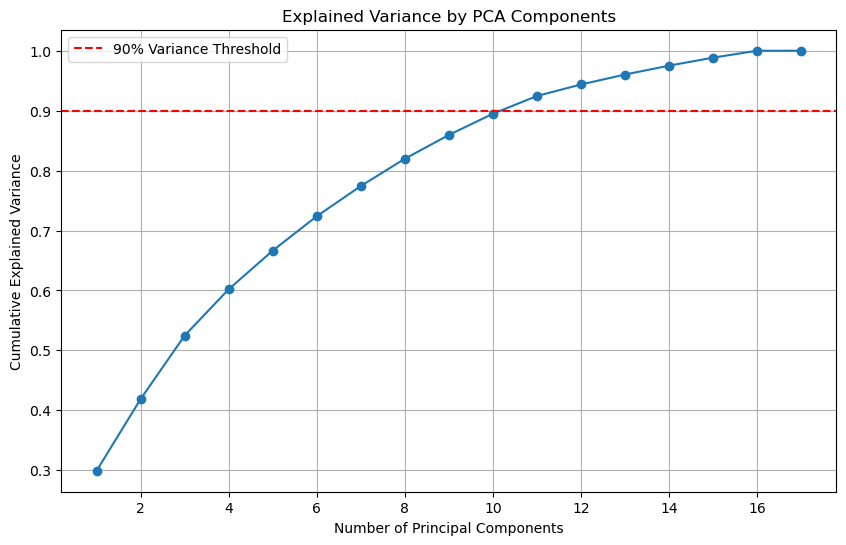

In [187]:

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Variance Threshold')
plt.grid(True)
plt.legend()
plt.show()

#### Create a table showing cumulative variance for components 6-10

In [189]:

component_range = range(6, 11)
variance_table = pd.DataFrame({
    'Number of Components': component_range,
    'Cumulative Variance Explained': [cumulative_variance[i-1] for i in component_range],
    'Additional Variance from Previous': [cumulative_variance[i-1] - (cumulative_variance[i-2] if i > 6 else 0) for i in component_range]
})

In [199]:
print("Cumulative Variance Analysis for Components 6-10:")
display(variance_table)


Cumulative Variance Analysis for Components 6-10:


,Number of Components,Cumulative Variance Explained,Additional Variance from Previous
0,6,0.723848,0.723848
1,7,0.774267,0.050419
2,8,0.819787,0.045520
3,9,0.859486,0.039699
4,10,0.894887,0.035402


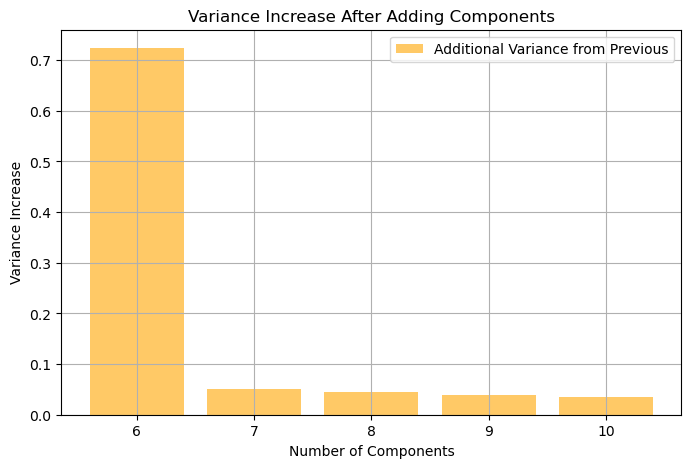

In [197]:
import matplotlib.pyplot as plt

# Extract data from the variance_table
components = variance_table["Number of Components"]

additional_variance = variance_table["Additional Variance from Previous"]

# Plot cumulative variance explained
plt.figure(figsize=(8, 5))


# Plot additional variance from previous as bars
plt.bar(components, additional_variance, alpha=0.6, color='orange', label="Additional Variance from Previous")

# Labels and title
plt.xlabel("Number of Components")
plt.ylabel("Variance Increase")
plt.title("Variance Increase After Adding Components")
plt.legend()
plt.grid(True)
plt.show()


In [201]:
print("\nObservation: The rate of increase in explained variance slows down after 6-7 components,")
print("suggesting diminishing returns from adding more components.")


Observation: The rate of increase in explained variance slows down after 6-7 components,
suggesting diminishing returns from adding more components.


## Applying PCA

In [209]:
n_components = 6 
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [211]:
print(f"Explained variance with {n_components} components: {np.sum(pca.explained_variance_ratio_):.4f}")

Explained variance with 6 components: 0.7238


In [213]:
# Converting PCA results to DataFrame
pca_df = pd.DataFrame(
    data=X_train_pca,
    columns=[f'PC{i+1}' for i in range(n_components)]
)


In [215]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6
0,-1.171273,0.111874,0.161439,-1.065742,-0.420144,0.185669
1,1.469591,-0.921776,-1.289633,0.145216,0.870719,-0.620467
2,-0.277686,-0.574300,-1.330738,0.306720,0.377474,-0.613955
3,1.832425,0.067230,-0.576774,-0.916707,-0.810285,1.042429
4,-1.812222,0.966271,-0.068421,-0.744016,0.509278,-1.266049
...,...,...,...,...,...,...
17207,0.502609,-1.744277,-0.338016,0.324621,-0.089884,-0.123018
17208,0.214225,2.811152,0.493203,0.149403,-0.631304,-0.988257
17209,-0.946127,0.030732,0.106501,-0.571173,-1.132356,0.699028
17210,2.254695,-1.081681,-1.471215,0.480211,0.393343,-0.510805


## correlation matrix after the PCA

In [218]:
corr_matrix = pca_df.corr()

## Plot correlation matrix

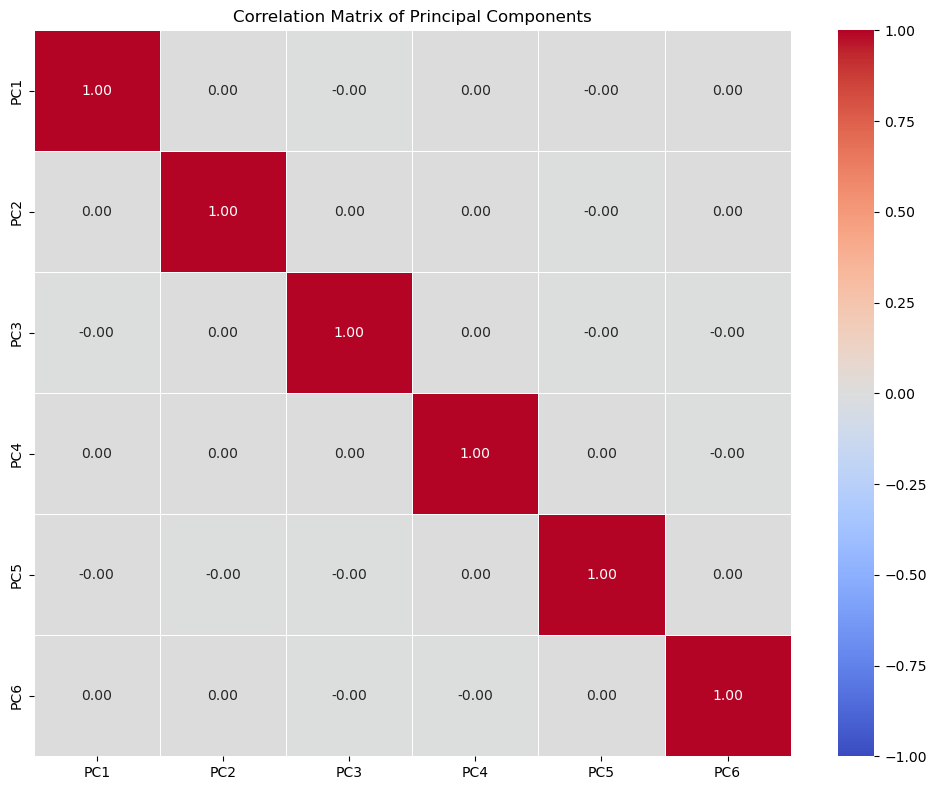

In [223]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, 
            fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Principal Components')
plt.tight_layout()
plt.show()

## Linear Regression with PCA components

In [226]:
lr_model = LinearRegression()
lr_model.fit(X_train_pca, y_train)
y_pred_lr = lr_model.predict(X_test_pca)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f"Linear Regression RMSE with PCA: {lr_rmse:.2f}")

Linear Regression RMSE with PCA: 188981.20


##  KNN Regression with PCA components

### KNN Regression with K = 5

In [74]:

# Train and evaluate KNN with k=5
knn5 = KNeighborsRegressor(n_neighbors=5)
knn5.fit(X_train_pca, y_train)
y_pred_knn5 = knn5.predict(X_test_pca)
mae_knn5 = mean_absolute_error(y_test, y_pred_knn5)
rmse_knn5 = np.sqrt(mean_squared_error(y_test, y_pred_knn5))
print(f"KNN-5 -> MAE: {mae_knn5:.2f}, RMSE: {rmse_knn5:.2f}")

KNN-5 -> MAE: 91540.66, RMSE: 153027.17


### KNN Regression with K = 10

In [76]:
# Train and evaluate KNN with k=10
knn10 = KNeighborsRegressor(n_neighbors=10)
knn10.fit(X_train_pca, y_train)
y_pred_knn10 = knn10.predict(X_test_pca)
mae_knn10 = mean_absolute_error(y_test, y_pred_knn10)
rmse_knn10 = np.sqrt(mean_squared_error(y_test, y_pred_knn10))
print(f"KNN-10 -> MAE: {mae_knn10:.2f}, RMSE: {rmse_knn10:.2f}")

KNN-10 -> MAE: 91515.45, RMSE: 155071.66


## KNN Classification

### For KNN Classification - convert continuous prices to categories

We use `pd.qcut()` to divide our target variable into three equal-sized groups (terciles), labeling them as 0, 1, and 2. This effectively converts our continuous target variable into categorical classes

In [235]:
y_class = pd.qcut(y, q=3, labels=[0, 1, 2])
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_train_pca, y_class[y_train.index], test_size=0.2, random_state=42
)

### KNN Classifier with K=5

In [237]:
knn5_class = KNeighborsClassifier(n_neighbors=5)

knn5_class.fit(X_train_class, y_train_class)


KNeighborsClassifier()

### KNN Classifier with K=10

In [239]:
knn10_class = KNeighborsClassifier(n_neighbors=10)
knn10_class.fit(X_train_class, y_train_class)

KNeighborsClassifier(n_neighbors=10)

In [84]:

y_pred_knn5_class = knn5_class.predict(X_test_class)
y_pred_knn10_class = knn10_class.predict(X_test_class)

### Finding the Accuracy for both KNN-5 and KNN -10 CLassifiers

In [86]:

acc_knn5 = accuracy_score(y_test_class, y_pred_knn5_class)
acc_knn10 = accuracy_score(y_test_class, y_pred_knn10_class)
print(f"KNN-5 Classification Accuracy: {acc_knn5:.4f}")
print(f"KNN-10 Classification Accuracy: {acc_knn10:.4f}")

KNN-5 Classification Accuracy: 0.7644
KNN-10 Classification Accuracy: 0.7874


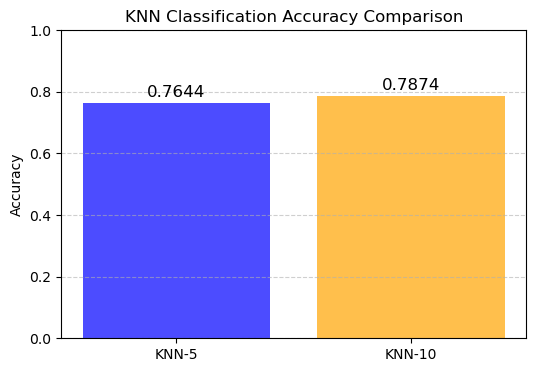

In [245]:
import matplotlib.pyplot as plt

# Accuracy values
knn_models = ["KNN-5", "KNN-10"]
accuracies = [acc_knn5, acc_knn10]

# Plot the bar chart
plt.figure(figsize=(6, 4))
plt.bar(knn_models, accuracies, color=['blue', 'orange'], alpha=0.7)

# Add labels and title
plt.ylabel("Accuracy")
plt.title("KNN Classification Accuracy Comparison")
plt.ylim(0, 1)  # Accuracy ranges between 0 and 1

# Display values on top of bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc:.4f}", ha='center', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


### Implementing Backward_Elimination Technique to select the Top 6 Features

In [394]:


def backward_elimination(X, y, num_features=6, significance_level=0.05):
    """
    Perform backward elimination to retain only the most significant features.

    Parameters:
    X (DataFrame): Feature matrix.
    y (Series): Target variable.
    num_features (int): Number of features to keep.
    significance_level (float): Threshold for feature elimination.

    Returns:
    DataFrame: Feature set with the top 'num_features' based on significance.
    """
    X = sm.add_constant(X)  # Add intercept
    while len(X.columns) > num_features + 1:  # +1 for the constant term
        ols_model = sm.OLS(y, X).fit()
        p_values = ols_model.pvalues[1:]  # Ignore the constant term
        
        # Remove the least significant feature
        feature_to_remove = p_values.idxmax()
        X = X.drop(columns=[feature_to_remove])
    
    return X.iloc[:, 1:]  # Remove constant column before returning

# Apply backward elimination to select top 6 features
X_train_selected = backward_elimination(X_train_raw, y_train, num_features=6)

# Print the selected features

top_features = X_train_selected.columns.tolist()
print("\nTop 6 Features After Backward Elimination:" , top_features)



Top 6 Features After Backward Elimination: ['view', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'lat']


In [281]:
##
# 12. Feature Importance Analysis with Original Features (not PCA)

#X_train_with_const = sm.add_constant(X_train_raw)
#ols_model = sm.OLS(y_train, X_train_with_const).fit()
#p_values = ols_model.pvalues[1:]  # Skip the constant term

# Sort features by significance (p-value)
#significant_features = p_values.sort_values().index.tolist()
#print("\nFeatures ranked by significance (p-value):")
#for i, feature in enumerate(significant_features[:6]):
 #   print(f"{i+1}. {feature}: {p_values[feature]:.6f}")

In [283]:
print(type(top_features))

<class 'list'>


### Linear Regression with Top Features (without PCA)

In [285]:

top_features = significant_features[:6]  # Top 6 features
X_train_top = X_train_raw[top_features]
X_test_top = X_test_raw[top_features]

regressor = LinearRegression()
regressor.fit(X_train_top, y_train)
y_pred_top = regressor.predict(X_test_top)
top_rmse = np.sqrt(mean_squared_error(y_test, y_pred_top))
print(f"\nLinear Regression RMSE with top features: {top_rmse:.2f}")


Linear Regression RMSE with top features: 193070.49


### Sample house price predictions for the first two houses in test set

In [309]:
sample_houses = X_test_raw.iloc[:2][top_features]
predicted_prices = np.round(regressor.predict(sample_houses)).astype(int)

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'House': [1, 2],
    'Actual Price': y_test.iloc[:2].values,
    'Predicted Price (Top Features)': predicted_prices,
    'Predicted Price (KNN-5)': y_pred_knn5[:2],
    'Predicted Price (KNN-10)': y_pred_knn10[:2]
})

print("\nComparison of Predicted Prices for Two Houses:")
display(comparison_df)


Comparison of Predicted Prices for Two Houses:


,House,Actual Price,Predicted Price (Top Features),Predicted Price (KNN-5),Predicted Price (KNN-10)
0,1,245000.0,234711,275640.0,293919.0
1,2,641000.0,518931,629400.0,616391.5


## Implementing the new algorithm to predict the House prices using other than KNN and MLR

### Random Forest Algorithm

In [330]:
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)



### Train on all original features

In [333]:

rf_model.fit(X_train_raw, y_train)
y_pred_rf = rf_model.predict(X_test_raw)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_mae = mean_absolute_error(y_test, y_pred_rf)


### Train Random Forest with only the top features

In [336]:

rf_model_top = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

In [338]:
X_train_top = X_train_raw[top_features]
X_test_top = X_test_raw[top_features]

rf_model_top.fit(X_train_top, y_train)
y_pred_rf_top = rf_model_top.predict(X_test_top)
rf_top_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf_top))
rf_top_mae = mean_absolute_error(y_test, y_pred_rf_top)

### Train Random Forest with PCA-transformed data

In [341]:

rf_model_pca = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

In [343]:
rf_model_pca.fit(X_train_pca, y_train)
y_pred_rf_pca = rf_model_pca.predict(X_test_pca)
rf_pca_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf_pca))
rf_pca_mae = mean_absolute_error(y_test, y_pred_rf_pca)

## Collecting All RMSE values for Prediction

In [358]:
rmse_results = pd.DataFrame({
    'Model': ['Linear Regression (PCA)', 'Linear Regression (Top Features)', 
              'KNN-5 (PCA)', 'KNN-10 (PCA)', 
              'Random Forest (All Features)', 'Random Forest (Top Features)', 'Random Forest (PCA)'],
    'RMSE': [lr_rmse, top_rmse, rmse_knn5, rmse_knn10, 
             rf_rmse, rf_top_rmse, rf_pca_rmse]})


## Displaying all the RMSE values Sorted in Asceneding order

In [361]:
print("Model Performance Comparison (RMSE):")
print(rmse_results.sort_values('RMSE'))

Model Performance Comparison (RMSE):
                              Model           RMSE
4      Random Forest (All Features)  117528.944191
6               Random Forest (PCA)  150520.182823
2                       KNN-5 (PCA)  153027.170000
5      Random Forest (Top Features)  153280.206288
3                      KNN-10 (PCA)  155071.660000
0           Linear Regression (PCA)  188981.200000
1  Linear Regression (Top Features)  193070.490000


## Predict prices for the same two houses 

In [364]:

sample_houses = X_test_raw.iloc[:2]
sample_houses_top = sample_houses[top_features]
sample_houses_pca = X_test_pca[:2]

## Make predictions with Random Forest models

In [367]:
rf_pred_house = rf_model.predict(sample_houses)
rf_top_pred_house = rf_model_top.predict(sample_houses_top)
rf_pca_pred_house = rf_model_pca.predict(sample_houses_pca)

## Bar chart to compare model performance (RMSE)

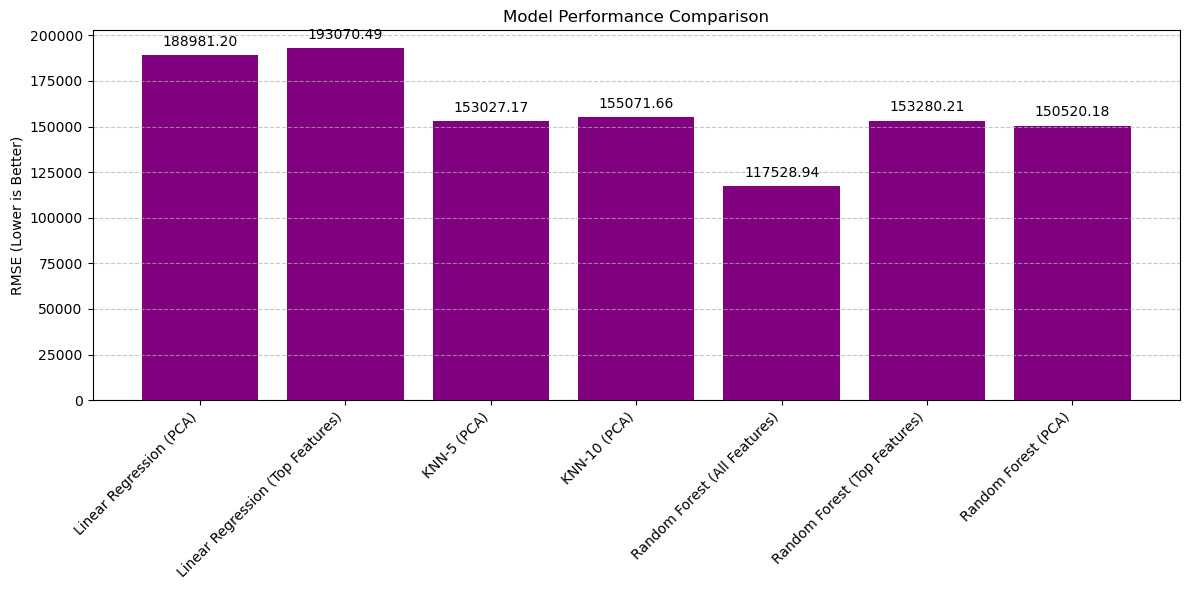

In [378]:

plt.figure(figsize=(12, 6))
plt.bar(rmse_results['Model'], rmse_results['RMSE'], color='purple')
plt.xticks(rotation=45, ha='right')
plt.ylabel('RMSE (Lower is Better)')
plt.title('Model Performance Comparison')
for i, v in enumerate(rmse_results['RMSE']):
    plt.text(i, v + 5000, f'{v:.2f}', ha='center')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

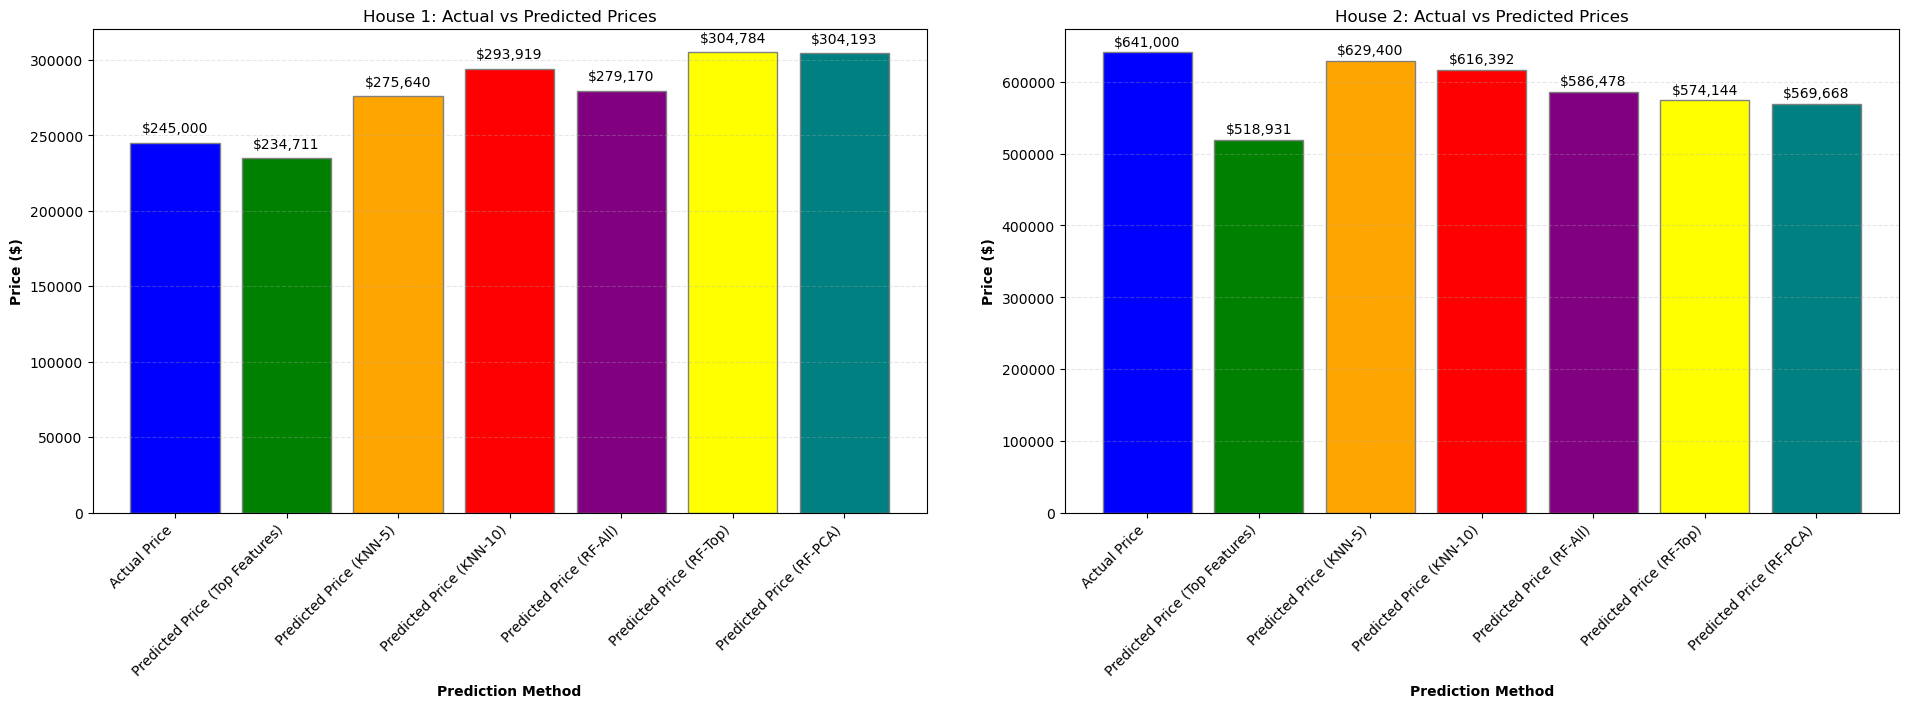

In [402]:
methods = ['Actual Price', 
           'Predicted Price (Top Features)',
           'Predicted Price (KNN-5)', 
           'Predicted Price (KNN-10)',
           'Predicted Price (RF-All)',
           'Predicted Price (RF-Top)',
           'Predicted Price (RF-PCA)']

colors = ['blue', 'green', 'orange', 'red', 'purple', 'yellow', 'teal']

# Get values for plotting - make sure we have the right number of values matching our methods
house1_values = [comparison_df.iloc[0]['Actual Price'],
                 comparison_df.iloc[0]['Predicted Price (Top Features)'],
                 comparison_df.iloc[0]['Predicted Price (KNN-5)'],
                 comparison_df.iloc[0]['Predicted Price (KNN-10)'],
                 rf_pred_house[0],  # RF with all features
                 rf_top_pred_house[0],  # RF with top features
                 rf_pca_pred_house[0]]  # RF with PCA

house2_values = [comparison_df.iloc[1]['Actual Price'],
                 comparison_df.iloc[1]['Predicted Price (Top Features)'],
                 comparison_df.iloc[1]['Predicted Price (KNN-5)'],
                 comparison_df.iloc[1]['Predicted Price (KNN-10)'],
                 rf_pred_house[1],  # RF with all features
                 rf_top_pred_house[1],  # RF with top features
                 rf_pca_pred_house[1]]  # RF with PCA

# Create a figure with two subplots side by side
plt.figure(figsize=(20, 8))

# First subplot for House 1
plt.subplot(1, 2, 1)
bars1 = plt.bar(methods, house1_values, color=colors, edgecolor='grey')
plt.xlabel('Prediction Method', fontweight='bold')
plt.ylabel('Price ($)', fontweight='bold')
plt.title('House 1: Actual vs Predicted Prices')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Add values on top of each bar for House 1
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5000,
             f'${height:,.0f}',
             ha='center', va='bottom', rotation=0)

# Second subplot for House 2
plt.subplot(1, 2, 2)
bars2 = plt.bar(methods, house2_values, color=colors, edgecolor='grey')
plt.xlabel('Prediction Method', fontweight='bold')
plt.ylabel('Price ($)', fontweight='bold')
plt.title('House 2: Actual vs Predicted Prices')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Add values on top of each bar for House 2
for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5000,
             f'${height:,.0f}',
             ha='center', va='bottom', rotation=0)

plt.tight_layout(pad=4.0)
plt.savefig('house_price_comparison.png', bbox_inches='tight')
plt.show()